In [1]:
import sys # modules in sys.path directories are all available for import
sys.path.append('./DevelopedMethods')
from DF import * # import np, pd, sklearn fn's --and df (https://www.kaggle.com/datasets/kartik2112/fraud-detection/)

In [2]:
df.head(1) # check it out, notice the added "source" ft. (for resplitting back into train/test)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,source
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,train


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

In [4]:
# make exploration easier, drop redundant columns:
df.drop(['Unnamed: 0', 'unix_time', 'trans_num'], axis = 1, inplace = True) # "Unnamed: 0" always == row index  &  "unix_time" isn't as readable as "trans_date_trans_time", "trans_num" is unique in every row (basically an id, so useless)

In [5]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'merch_lat', 'merch_long', 'is_fraud',
       'source'],
      dtype='object')

In [6]:
df.head(1) # check it out again

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,source
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,train


# Encoding Categorical Features (one-hot encoding / dummy ft's., etc.)

In [8]:
# manually encode binary/simple labels
# categorical features:
# df["trans_date_trans_time"] = df["trans_date_trans_time"].apply(lambda x: 1 if x == "2019-01-01 00:00:18" else 0)
# df["merchant"] = df["merchant"].apply(lambda x: 1 if x == "fraud_Rippin, Kub and Mann" else 0)
# df["category"] = df["category"].apply(lambda x: 1 if x == "misc_net" else 0)
# df["first"] = df["first"].apply(lambda x: 1 if x == "Jennifer" else 0)
# df["last"] = df["last"].apply(lambda x: 1 if x == "Banks" else 0)
df["gender"] = df["gender"].apply(lambda x: 1 if x == "M" else 0)
# df["street"] = df["street"].apply(lambda x: 1 if x == "561 Perry Cove" else 0)
# df["city"] = df["city"].apply(lambda x: 1 if x == "Moravian Falls" else 0)
# df["state"] = df["state"].apply(lambda x: 1 if x == "NC" else 0)
# df["job"] = df["job"].apply(lambda x: 1 if x == "Psychologist, counselling" else 0)
# df["dob"] = df["dob"].apply(lambda x: 1 if x == "1988-03-09" else 0)

# split trans_date_trans_time into y-m-d-h-m-s columns
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month
df['day'] = df['trans_date_trans_time'].dt.day
df['hour'] = df['trans_date_trans_time'].dt.hour
df['minute'] = df['trans_date_trans_time'].dt.minute
df['second'] = df['trans_date_trans_time'].dt.second
df = df.drop(columns=['trans_date_trans_time'])

In [9]:
# one-hot encoding features w/ few values
df = pd.get_dummies(df, columns=['category', 'state'], drop_first=True) # 14, 51 unique values

In [10]:
# Label Encoding (convert value into unique int) - good for ft. w/ many unique values
label_enc = LabelEncoder()
df['merchant'] = label_enc.fit_transform(df['merchant']) # 693 unique values
df['first'] = label_enc.fit_transform(df['first']) # 355 unique values
df['last'] = label_enc.fit_transform(df['last']) # 486 unique values
df['street'] = label_enc.fit_transform(df['street']) # 999 unique values
df['city'] = label_enc.fit_transform(df['city']) # 906 unique values
df['job'] = label_enc.fit_transform(df['job']) # 497 unique values
df['dob'] = label_enc.fit_transform(df['dob']) # 984 unique values

In [12]:
# another encoding option: "Leave-One-Out Encoding" or "Target Encoding" --Useful when features have many categories and you want to avoid adding too many columns. --Encodes based on the relationship of the feature with the target variable (is_fraud).
# import category_encoders as ce
# target_enc = ce.TargetEncoder(cols=['merchant', 'job'])
# df = target_enc.fit_transform(df, df['is_fraud'])

# Drop rows w/ missing values, less impactful ft's

In [2]:
# # Handle missing values
# train_data = train_data.dropna()
# test_data = test_data.dropna()

# # Drop less impactful ft's
# df = df.drop(['street', 'first', 'last', 'dob'], axis=1) # more features with bad impact (or no impact)

# Resplit df —> df_train, df_test

In [16]:
df, df_train, df_test = resplit_train_test(df) # currently df is df_train + df_test,  tracked by the added 'source' feature (train or test)         --also removes the source column from df

# Explore Data - For Further Feature Selection
### Column value uniqueness; checking for correlations & how features relate to each other

In [18]:
fraud = df[df['is_fraud'] > 0]
legit = df[df['is_fraud'] == 0]
print("legit:", len(legit), ", fraud:", len(fraud))

legit: 1842743 , fraud: 9651


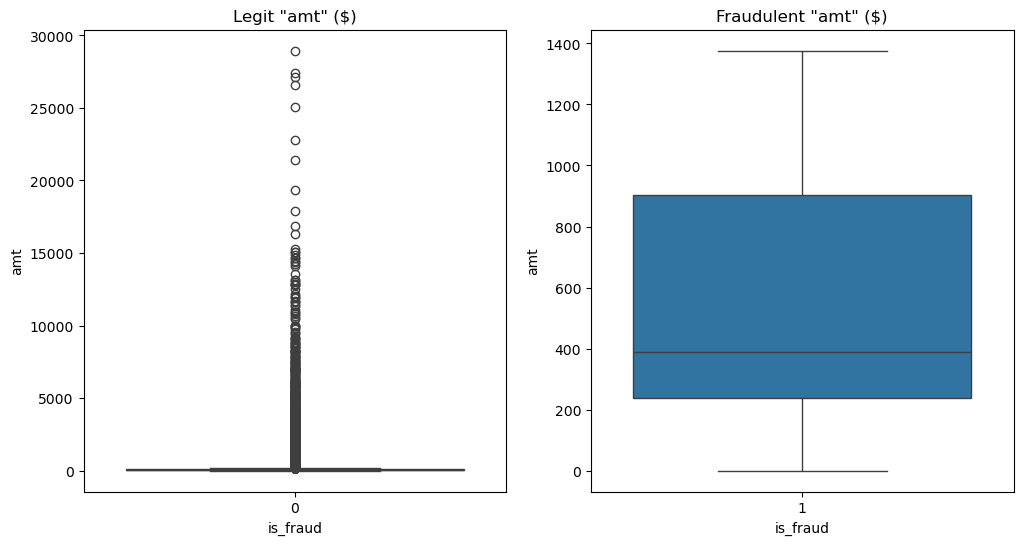

In [19]:
%matplotlib inline

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) # 1x2 plot (rowsxcolumns), 12x6 inches... fig = canvas (or container), axes = subplots

# First boxplot - Legit "amt" ($) by Fraud Status
sns.boxplot(x='is_fraud', y='amt', data=legit, ax=axes[0])
axes[0].set_title('Legit "amt" ($)')

# Second boxplot - Fraudulent Transaction "amt"
sns.boxplot(x='is_fraud', y='amt', data=fraud, ax=axes[1])
axes[1].set_title('Fraudulent "amt" ($)')

plt.show()

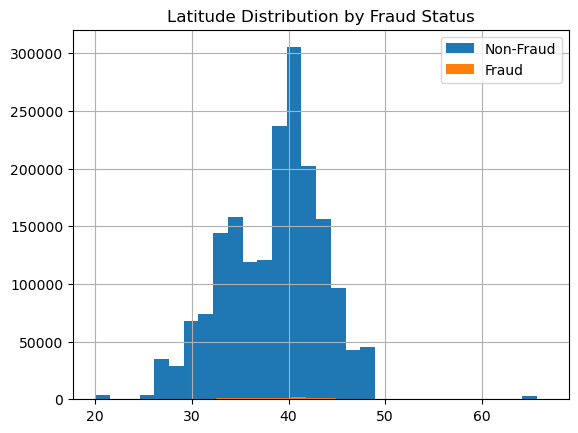

In [20]:
#  For continuous features like lat and long, histograms can show the distribution of transaction locations.
df[df['is_fraud'] == 0]['lat'].hist(alpha=1, label='Non-Fraud', bins=30)
df[df['is_fraud'] == 1]['lat'].hist(alpha=1, label='Fraud', bins=30)
plt.legend()
plt.title('Latitude Distribution by Fraud Status')
plt.show()

In [21]:
# plot broken since encoding category, category -> category_1, category_2, category_3, ...

# print(list(enumerate(df.columns))) # make easy to see feature index/name pair

# # Create subplots
# fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# # First plot - Legit "amt" ($) by Fraud Status
# sns.countplot(x='category', hue='is_fraud', data=legit, ax=axes[0])
# axes[0].set_title('Legit Feature Value')
# axes[0].set_xticks(range(len(axes[0].get_xticks())))  # Ensure ticks are set before labeling
# axes[0].set_xticklabels([str(i) for i in range(len(axes[0].get_xticks()))], rotation=45)

# # Second plot - Fraudulent Transaction "amt"
# sns.countplot(x='category', hue='is_fraud', data=fraud, ax=axes[1])
# axes[1].set_title('Fraud Feature Value')
# axes[1].set_xticks(range(len(axes[1].get_xticks())))  # Ensure ticks are set before labeling
# axes[1].set_xticklabels([str(i) for i in range(len(axes[1].get_xticks()))], rotation=45)

# # Show the plots
# plt.tight_layout()
# plt.show()

# # seems like 0 (trans_date_trans_time) can imply fraud
# # seems like 2 (merchant)              can slightly imply fraud

# # seems like 1 (cc_num), 3 (category), 5-13 (category, amt, first, last, gender, street, city, state, zip, lat, long)
# #                                      can imply legit
# # seems like 4 (amt)                   can very slightly imply legit


# Feature Matrix (X) & Target/label Vector (y)

In [23]:
X_train = df_train.drop(columns=['is_fraud'])
X_test = df_test.drop(columns=['is_fraud'])
y_train = df_train['is_fraud']
y_test = df_test['is_fraud']

# Check if imbalanced (more non-fraud than fraud cases or vice-versa); if imbalanced: “SMOTE” or “undersampling” can balance classes

In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.2, random_state=42)  # Resample minority class to 20% of majority class
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
X_test_balanced, y_test_balanced = smote.fit_resample(X_test, y_test)
# Check the new class distribution
print("Original class distribution:", np.bincount(y_train))
print("Balanced class distribution:", np.bincount(y_train_balanced))

Original class distribution: [1289169    7506]
Balanced class distribution: [1289169  257833]


# Normalize/Scale data if needed

In [27]:
X_train_balanced.head(1) # before normalize

,cc_num,merchant,amt,first,last,gender,street,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,year,month,day,hour,minute,second,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,2703186189652095,514,4.97,164,18,0,576,532,28654,36.0788,-81.1781,3495,372,791,36.011293,-82.048315,2019,1,1,0,0,18,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
# this ran before # Feature Matrix (X) & Target/label Vector (y), but we cannot SMOTE (imbalance handling) non-discrete/continuous values (ie: scaling converts nearly everything into a decimal)
# so, we now have to apply to: X_train, X_test (opposed to df_train & df_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test_balanced)
# Re-wrap the scaled data into a DataFrame with original column names and indices (scaler transforms into numpy.ndarray (NOT a dataframe))
X_train_balanced = pd.DataFrame(X_train_scaled, columns=X_train_balanced.columns, index=X_train_balanced.index)
X_test_balanced = pd.DataFrame(X_test_scaled, columns=X_test_balanced.columns, index=X_test_balanced.index)

In [56]:
X_train_balanced.head(1) # after normalize

,cc_num,merchant,amt,first,last,gender,street,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,year,month,day,hour,minute,second,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,-0.315576,0.878161,-0.537506,-0.1761,-1.714156,-0.92346,0.279412,0.316729,-0.742513,-0.487052,0.649627,-0.28355,0.849794,0.926149,-0.496707,0.586275,-0.637482,-1.472824,-1.66395,-1.794895,-1.742117,-0.680504,-0.26255,-0.356526,-0.191565,-0.419021,-0.252835,-0.307389,-0.297552,3.504285,-0.256373,-0.266735,-0.372211,-0.346011,-0.176713,-0.179633,-0.155714,-0.088614,-0.213793,-0.10721,-0.073124,-0.052826,-0.014451,-0.186449,-0.143187,-0.042422,-0.145088,-0.061895,-0.186009,-0.145802,-0.136208,-0.149303,-0.125535,-0.097963,-0.143925,-0.116046,-0.190513,-0.160003,-0.172665,-0.127962,-0.091323,6.535989,-0.104843,-0.140906,-0.081762,-0.137106,-0.111757,-0.068424,-0.265758,-0.196037,-0.143588,-0.124583,-0.256433,-0.026345,-0.153813,-0.098077,-0.12097,-0.278156,-0.091466,-0.154324,-0.095907,-0.120311,-0.151662,-0.142326,-0.122548
